In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # ignore info and warnings

from utils import DatasetWrapper, ModelWrapper

/home/nic/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
lr = 1e-3
epochs = 20
dataset = DatasetWrapper(dataset_path='/data/train', img_size=224, batch_size=64)
dataset.make_datagens()

Found 3330 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.


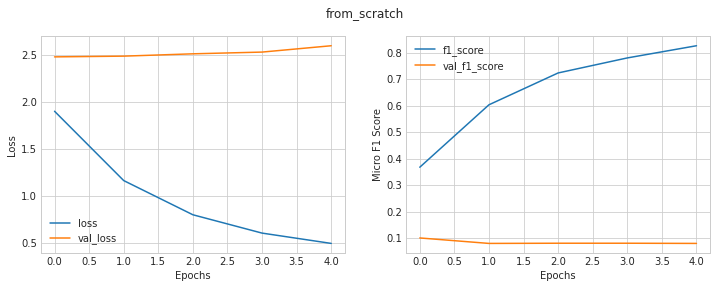

CPU times: user 6min 10s, sys: 17.9 s, total: 6min 28s
Wall time: 4min 40s


In [3]:
%%time
dataset.make_datagens()
model = ModelWrapper(dataset)
model.make_model(figname='from_scratch', weights=None)
model.compile(lr=lr)
model.fit(epochs=5)

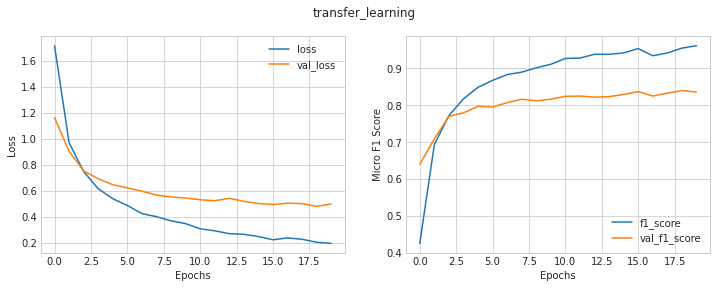

CPU times: user 17min 20s, sys: 58.8 s, total: 18min 19s
Wall time: 17min 33s


In [4]:
%%time
dataset.make_datagens()
model = ModelWrapper(dataset)
model.make_model(figname='transfer_learning')
model.compile(lr=lr)
model.fit(epochs=epochs)

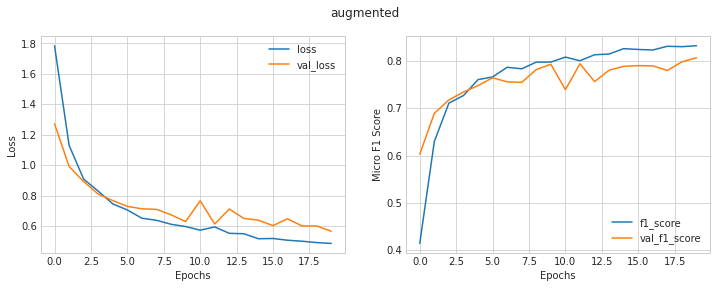

CPU times: user 52min 15s, sys: 1min 21s, total: 53min 36s
Wall time: 52min 12s


In [5]:
%%time
dataset.make_datagens(augment=True)
model = ModelWrapper(dataset)
model.make_model(figname='augmented')
model.compile(lr=lr)
model.fit(epochs=epochs)

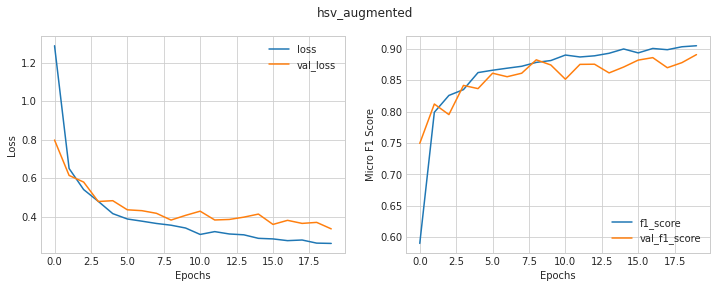

CPU times: user 56min 39s, sys: 1min 24s, total: 58min 3s
Wall time: 56min 35s


In [6]:
%%time
dataset.make_datagens(augment=True, hsv_mask=True)
model = ModelWrapper(dataset)
model.make_model(figname='hsv_augmented')
model.compile(lr=lr)
model.fit(epochs=epochs)

In [4]:
mapping = dataset.train_generator.class_indices
classes = dataset.train_generator.classes
class_weight = {v: len(classes[classes == v]) for k, v in mapping.items()}
max_ = max(list(class_weight.values()))
class_weight = {k: max_ / v for k, v in class_weight.items()}

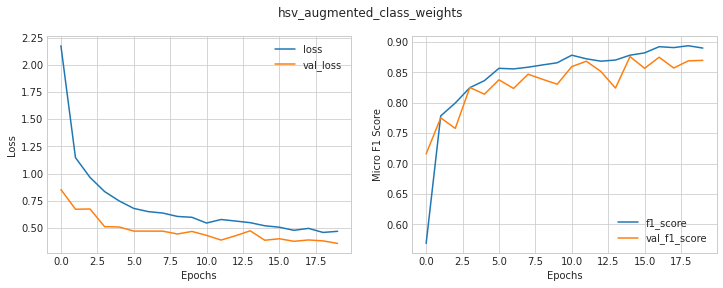

CPU times: user 24min 51s, sys: 51.4 s, total: 25min 42s
Wall time: 19min 33s


In [40]:
%%time
dataset.make_datagens(augment=True, hsv_mask=True)
model = ModelWrapper(dataset)
model.make_model(figname='hsv_augmented_class_weights')
model.compile(lr=lr)
model.fit(epochs=epochs, class_weight=class_weight)